In [1]:
import json
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import subprocess

In [40]:
inp = {
    'grid_params': {
        'block_size': 256,
        'grid_size': 256,
    },
    'run': {
        'seed': 12345,
        'energy': 100, # MeV
        'num_tracks': 256 * 256,
        'max_steps': 1, # XXX FOR USE WITH HACKED VERSION
        'tally_grid': {
            'size': 256*256,
            'front': 0,
            'delta': 0.0001,
        }
    }
}

results = subprocess.check_output([
    "ssh", "emmet", "~/.local/src/celeritas/build-opt/app/demo-interactor", "-"],
    input=json.dumps(inp).encode())
results = json.loads(results.decode())
print("Completed in", results['result']['total_time'], "seconds")

Completed in 0.173212353 seconds


In [41]:
tally = results['run']['tally_grid']
grid = np.arange(tally['size'] + 1) * tally['delta'] + tally['front']

In [50]:
!open .

In [54]:
with open("../tables/LambdaPrim.compt.gamma.json") as f:
    ref = json.load(f)['physics_vector']
ref_e = np.array(ref['energy'])
ref_xs = np.array(ref['xs_eloss'])

In [60]:
invmm_to_invcm = 10
xs_value = ref_xs[np.where(ref_e == 100.0)][0] * invmm_to_invcm
xs_value

0.65124075336

Text(0, 0.5, 'Cumulative energy deposition / MeV')

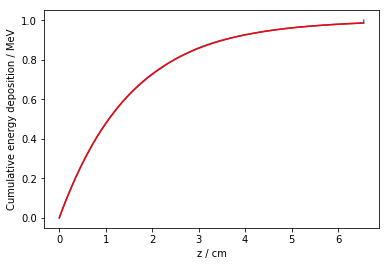

In [61]:
edep = np.cumsum(results['result']['edep'])
(fig, ax) = plt.subplots()
ax.plot(grid[:-1], edep, drawstyle='steps-post')
ax.plot(grid, (1 - np.exp(-xs_value * grid)), color='r')
ax.set_xlabel('z / cm')
ax.set_ylabel('Cumulative energy deposition / MeV')

In [ ]:
plt.plot(results['result']['alive'], '.');

In [ ]:
plt.plot(results['result']['time'], '.');